### Customer Churn Prediction model

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Dataset

In [2]:
train_data = pd.read_csv('Data/Churn_Modelling.csv')
train_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
train_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
train_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Cleaning Data

In [6]:
#selecting only numerical columns
numeric_columns = train_data.select_dtypes(include=['number']).columns

#Excluding non-relevant columns
numeric_columns= numeric_columns.drop(['RowNumber','CustomerId'])

# Data visualization

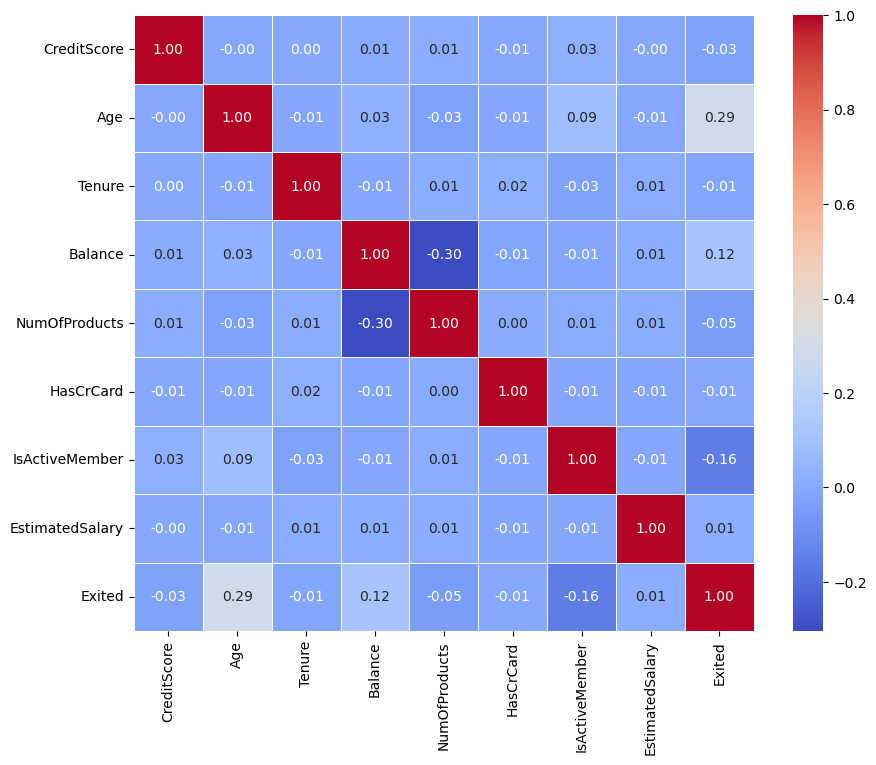

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data[numeric_columns].corr(), annot = True, cmap= 'coolwarm',fmt = ".2f", linewidths=.5)
plt.show()

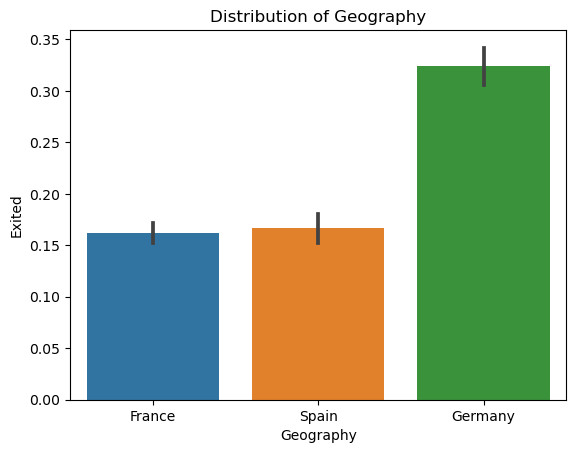

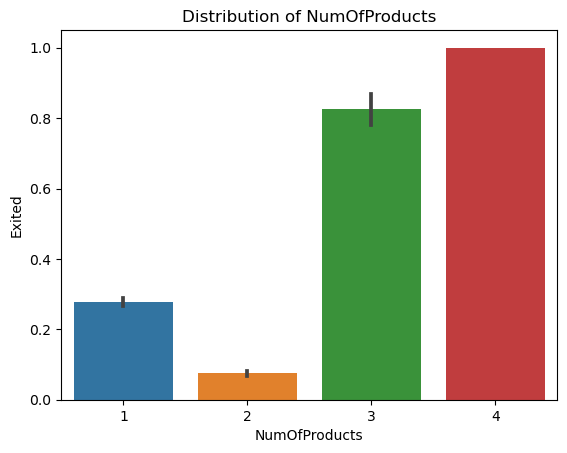

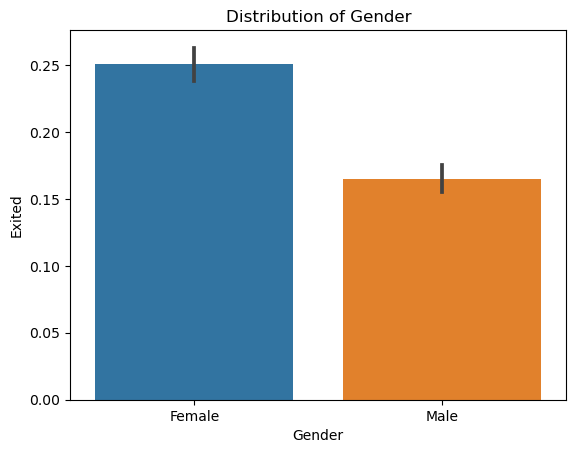

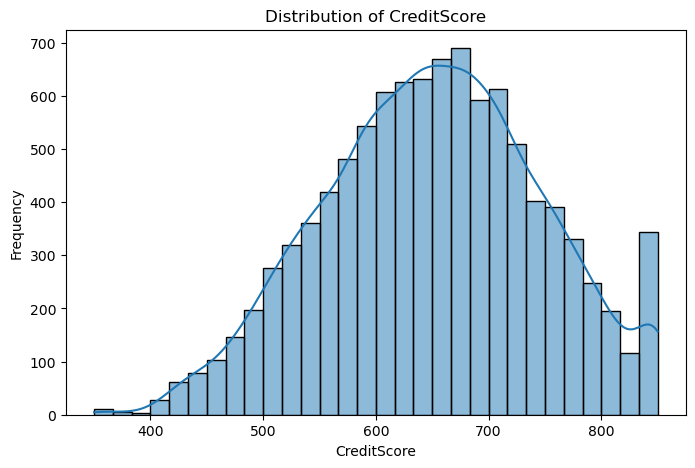

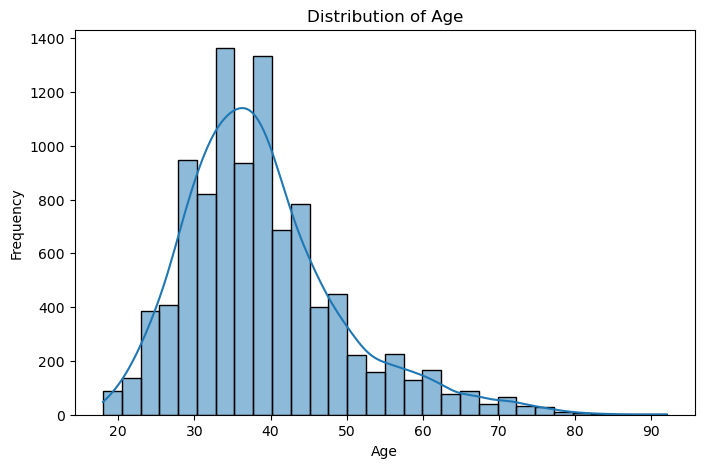

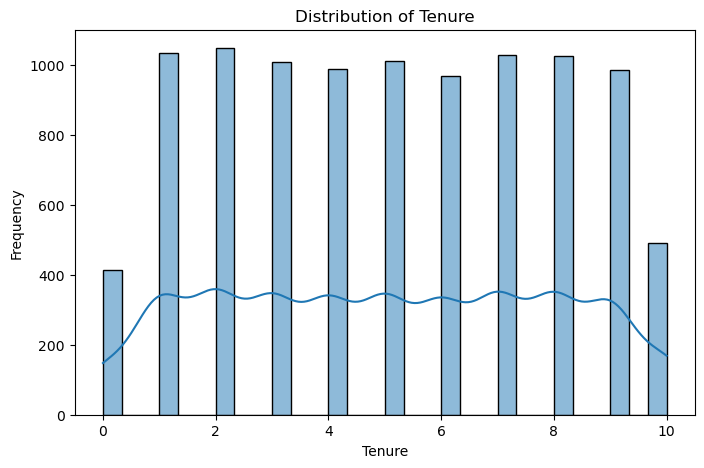

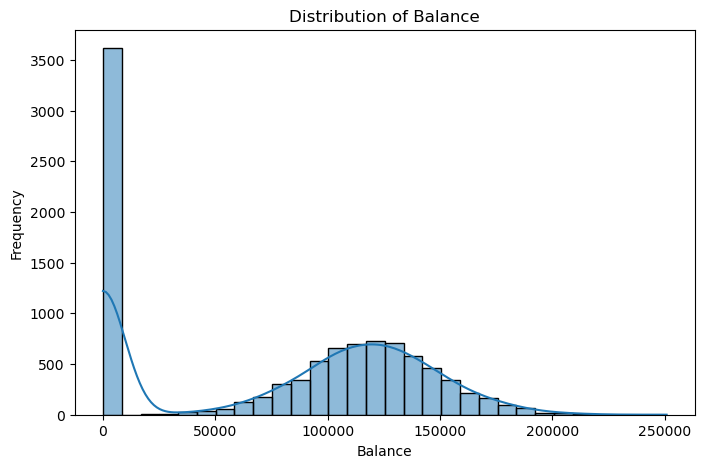

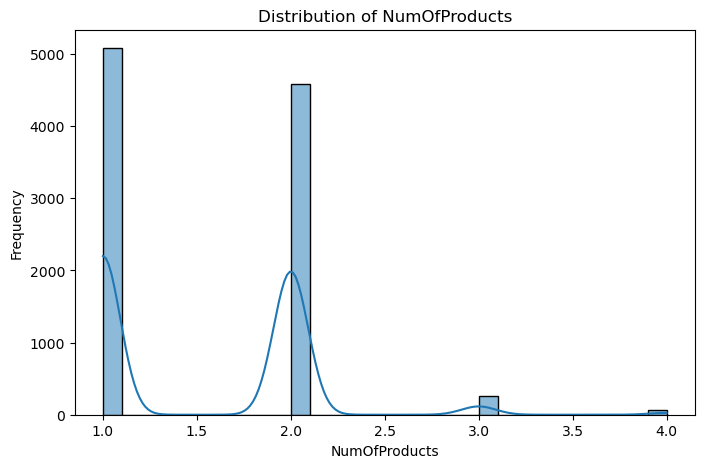

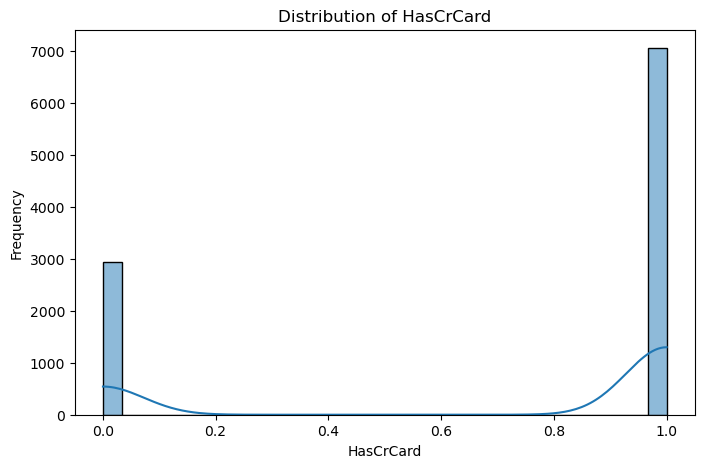

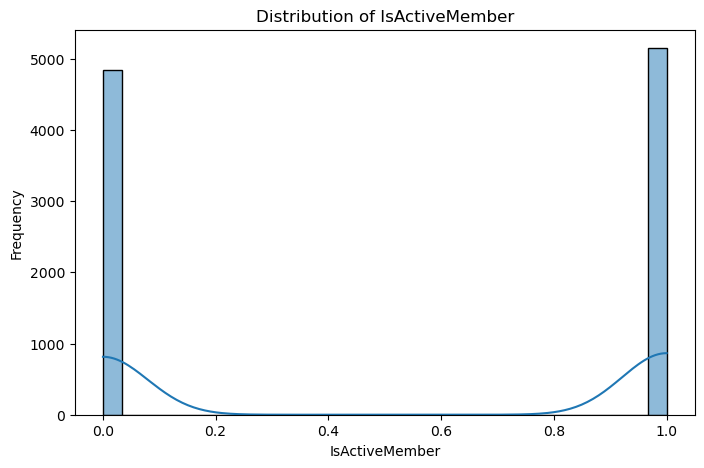

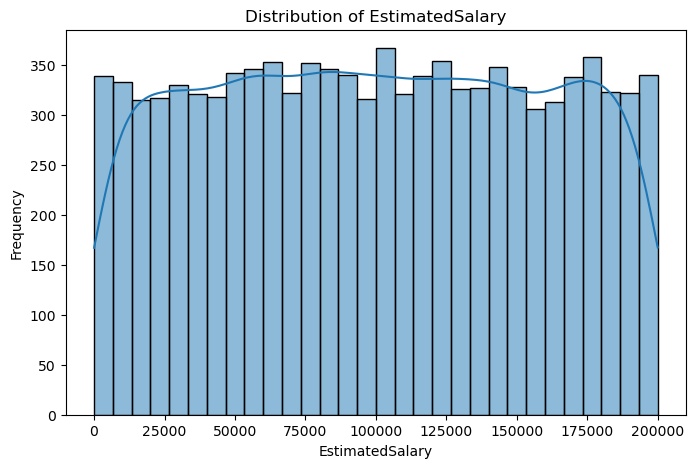

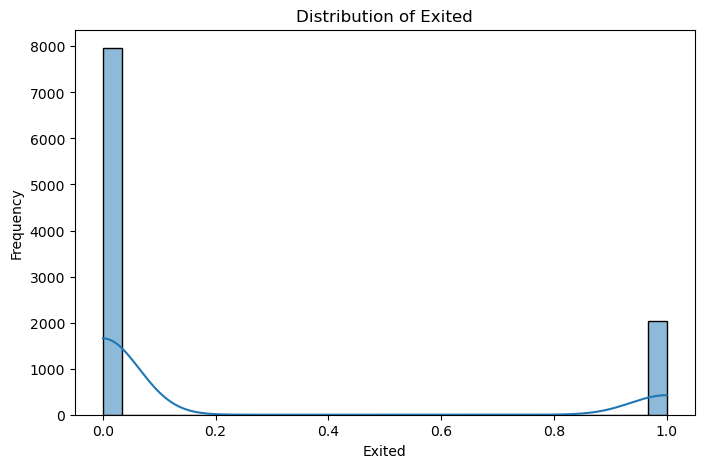

In [8]:
# Distribution of categorical features
categorical_column = ['Geography','NumOfProducts','Gender']
for column in categorical_column:
    sns.barplot(x = column, y='Exited',data = train_data)
    plt.title(f'Distribution of {column}')
    plt.show()

# Distribution of numerical features
for column in numeric_columns:
    plt.figure(figsize = (8,5))
    sns.histplot(train_data[column], bins = 30, kde= True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Data Transformation

In [9]:
# One hot encoding for categorical features
categorical_features = ['Gender', 'Geography']
train_data = pd.get_dummies(train_data, columns=categorical_features,drop_first=True)

In [10]:
train_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Gender_Male        10000 non-null  bool   
 13  Geography_Germany  10000 non-null  bool   
 14  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(9), object(1)
memory usage: 966.9+ KB


# Select Data

In [12]:
columns_to_drop = ['CustomerId', 'Surname', 'RowNumber']
select_data = train_data.drop(columns=columns_to_drop)
select_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
select_data = select_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain', 'Exited']]

In [14]:
select_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,Exited
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,1
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,0
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,1
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,0
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,0
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,1
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False,1


In [15]:
X_train = select_data.drop(columns=['Exited'])
y_train = select_data['Exited']

# Scaling data

In [16]:
sc = StandardScaler()
newValue = sc.fit_transform(X_train)
X_train_scaler = pd.DataFrame(newValue,columns=X_train.columns)
X_train_scaler

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.912419,-0.578736,-0.573809
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.912419,-0.578736,-0.573809
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-1.095988,-0.578736,-0.573809
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,0.912419,1.727904,-0.573809


In [17]:
print(X_train.shape)
y_train.shape
X_train_scaler

(10000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-1.095988,-0.578736,-0.573809
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.095988,-0.578736,1.742740
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-1.095988,-0.578736,-0.573809
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.095988,-0.578736,-0.573809
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.095988,-0.578736,1.742740
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.912419,-0.578736,-0.573809
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.912419,-0.578736,-0.573809
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-1.095988,-0.578736,-0.573809
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,0.912419,1.727904,-0.573809


# Training Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_train_scaler, y_train, test_size=0.2, random_state=42)
lg = RandomForestClassifier(random_state = 42)
lg.fit(X_train,y_train)
prediction = lg.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
report = classification_report(y_test,prediction)
print(f"Accuracy: {accuracy} Classification report:\n {report}")


Accuracy: 0.869 Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



### Accuracy score is 87%